In [1]:
# Import IBKR data fetcher
import asyncio
import importlib

# Reload config and ibkr_data_async to pick up any changes (important if you modified config.py)
import config
importlib.reload(config)
import ibkr_data_async
importlib.reload(ibkr_data_async)
from ibkr_data_async import DataFetcherAsync
from config import IBKR_HOST, IBKR_PORT, IBKR_CLIENT_ID

# Verify the port being used
print(f"Connecting to IBKR at {IBKR_HOST}:{IBKR_PORT}")
print(f"Client ID: {IBKR_CLIENT_ID}")

IBKR_PORT = 4001

# Set your tickers and years here
tickers = ["TLT"]
years = 30
force_refresh = False  # Set to True to bypass cache and re-download

# Initialize and connect (explicitly pass port to avoid caching issues)
fetcher = DataFetcherAsync(
    host=IBKR_HOST,
    port=IBKR_PORT,  # This will use the reloaded config value
    client_id=IBKR_CLIENT_ID
)

# Connect to IBKR (make sure TWS/Gateway is running!)
await fetcher.connect()
print("Connected to IBKR!")

# Fetch data for multiple tickers
all_data = await fetcher.fetch_all_tickers_data(
    tickers=tickers,
    years=years,
    force_refresh=force_refresh,
    max_concurrent=5
)

# Display results
for ticker, df in all_data.items():
    if df is not None:
        print(f"\n{ticker}:")
        print(f"  Shape: {df.shape}")
        print(f"  Date range: {df.index.min()} to {df.index.max()}")
        print(f"  First few rows:")
        print(df.head())

# Disconnect when done
fetcher.ib.disconnect()
print("\nDisconnected from IBKR")


Connecting to IBKR at 127.0.0.1:7496
Client ID: 1


Error 321, reqId -1: Error validating request.-'ct' : cause - The API interface is currently in Read-Only mode.
Error 321, reqId -1: Error validating request.-'b3' : cause - The API interface is currently in Read-Only mode.
open orders request timed out
completed orders request timed out


Connected to IBKR!

TLT:
  Shape: (5593, 13)
  Date range: 2002-08-19 00:00:00+00:00 to 2025-11-21 00:00:00+00:00
  First few rows:
                            open   high    low  close   volume    average  \
date                                                                        
2002-08-19 00:00:00+00:00  46.88  46.88  46.85  46.85   2000.0  46.845638   
2002-08-21 00:00:00+00:00  47.32  47.32  47.32  47.32   1000.0  47.319661   
2002-09-03 00:00:00+00:00  48.45  48.46  48.43  48.43   1800.0  48.427553   
2002-09-05 00:00:00+00:00  48.73  48.83  48.64  48.74  13200.0  48.736219   
2002-09-06 00:00:00+00:00  48.35  48.35  48.10  48.10   1900.0  48.102351   

                           barCount   returns  log_returns  day_of_month  \
date                                                                       
2002-08-19 00:00:00+00:00         1       NaN          NaN            19   
2002-08-21 00:00:00+00:00         1  0.010032     0.009982            21   
2002-09-03 00:00:00+00:0

In [2]:
from data_cleaning import Data
import pickle_utils
importlib.reload(pickle_utils)
from pickle_utils import save_pickle_data

data_processor = Data(
    tickers=["TLT"],
    dfs=all_data,
    years=30
)



# clean_data() returns a dictionary: {'SPY': DataFrame, ...}
cleaned_data = data_processor.clean_data()
TLT_df = cleaned_data["TLT"]

save_pickle_data("TLT", TLT_df)

# Access the DataFrame using the ticker as key


TLT_df.head()

Saved TLT to /Users/shrey/Desktop/Research/data/pickle/TLT.xz


,open,high,low,close,volume,average,barCount,returns,log_returns,day_of_month,day_of_week,month,year
date,,,,,,,,,,,,,
2002-08-19 00:00:00+00:00,46.88,46.88,46.85,46.85,2000.0,46.845638,1,NaN,NaN,19,0,8,2002
2002-08-21 00:00:00+00:00,47.32,47.32,47.32,47.32,1000.0,47.319661,1,0.010032,0.009982,21,2,8,2002
2002-09-03 00:00:00+00:00,48.45,48.46,48.43,48.43,1800.0,48.427553,1,0.023457,0.023186,3,1,9,2002
2002-09-05 00:00:00+00:00,48.73,48.83,48.64,48.74,13200.0,48.736219,1,0.006401,0.006381,5,3,9,2002
2002-09-06 00:00:00+00:00,48.35,48.35,48.10,48.10,1900.0,48.102351,1,-0.013131,-0.013218,6,4,9,2002


In [3]:
import importlib
from json import load
import pickle_utils
importlib.reload(pickle_utils)  # Reload to pick up the new function
from pickle_utils import load_all_pickle_data

# Load all tickers from pickle files

tickers = ["TLT"]
all_data = load_all_pickle_data(tickers = tickers)

all_data["TLT"].head()

,open,high,low,close,volume,average,barCount,returns,log_returns,day_of_month,day_of_week,month,year
date,,,,,,,,,,,,,
2002-08-19 00:00:00+00:00,46.88,46.88,46.85,46.85,2000.0,46.845638,1,NaN,NaN,19,0,8,2002
2002-08-21 00:00:00+00:00,47.32,47.32,47.32,47.32,1000.0,47.319661,1,0.010032,0.009982,21,2,8,2002
2002-09-03 00:00:00+00:00,48.45,48.46,48.43,48.43,1800.0,48.427553,1,0.023457,0.023186,3,1,9,2002
2002-09-05 00:00:00+00:00,48.73,48.83,48.64,48.74,13200.0,48.736219,1,0.006401,0.006381,5,3,9,2002
2002-09-06 00:00:00+00:00,48.35,48.35,48.10,48.10,1900.0,48.102351,1,-0.013131,-0.013218,6,4,9,2002


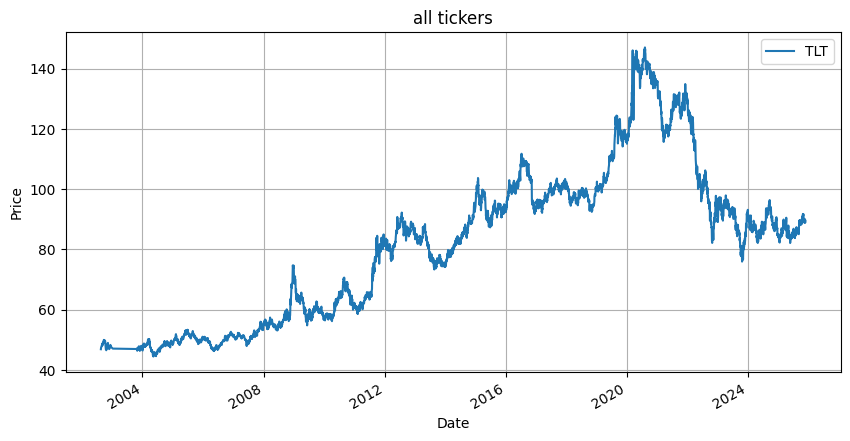

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

for ticker, df in all_data.items():
    ax.plot(df.index, df['close'], label = ticker)

ax.set_title("all tickers")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)
fig.autofmt_xdate()
plt.show()

In [5]:
TLT = all_data['TLT']
TLT.head()

,open,high,low,close,volume,average,barCount,returns,log_returns,day_of_month,day_of_week,month,year
date,,,,,,,,,,,,,
2002-08-19 00:00:00+00:00,46.88,46.88,46.85,46.85,2000.0,46.845638,1,NaN,NaN,19,0,8,2002
2002-08-21 00:00:00+00:00,47.32,47.32,47.32,47.32,1000.0,47.319661,1,0.010032,0.009982,21,2,8,2002
2002-09-03 00:00:00+00:00,48.45,48.46,48.43,48.43,1800.0,48.427553,1,0.023457,0.023186,3,1,9,2002
2002-09-05 00:00:00+00:00,48.73,48.83,48.64,48.74,13200.0,48.736219,1,0.006401,0.006381,5,3,9,2002
2002-09-06 00:00:00+00:00,48.35,48.35,48.10,48.10,1900.0,48.102351,1,-0.013131,-0.013218,6,4,9,2002


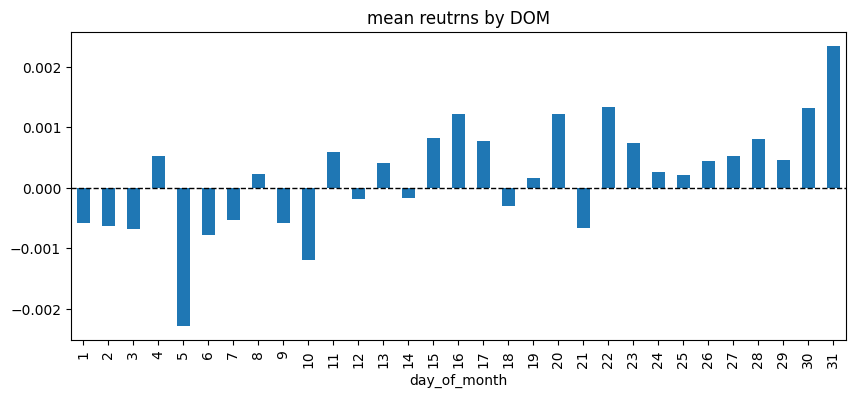

In [6]:
dom_ret = TLT.groupby('day_of_month')['returns'].mean().sort_index()

dom_ret.plot(kind='bar', figsize=(10,4), title="mean reutrns by DOM")
plt.axhline(0, color='k', ls="--", lw=1)
plt.show()

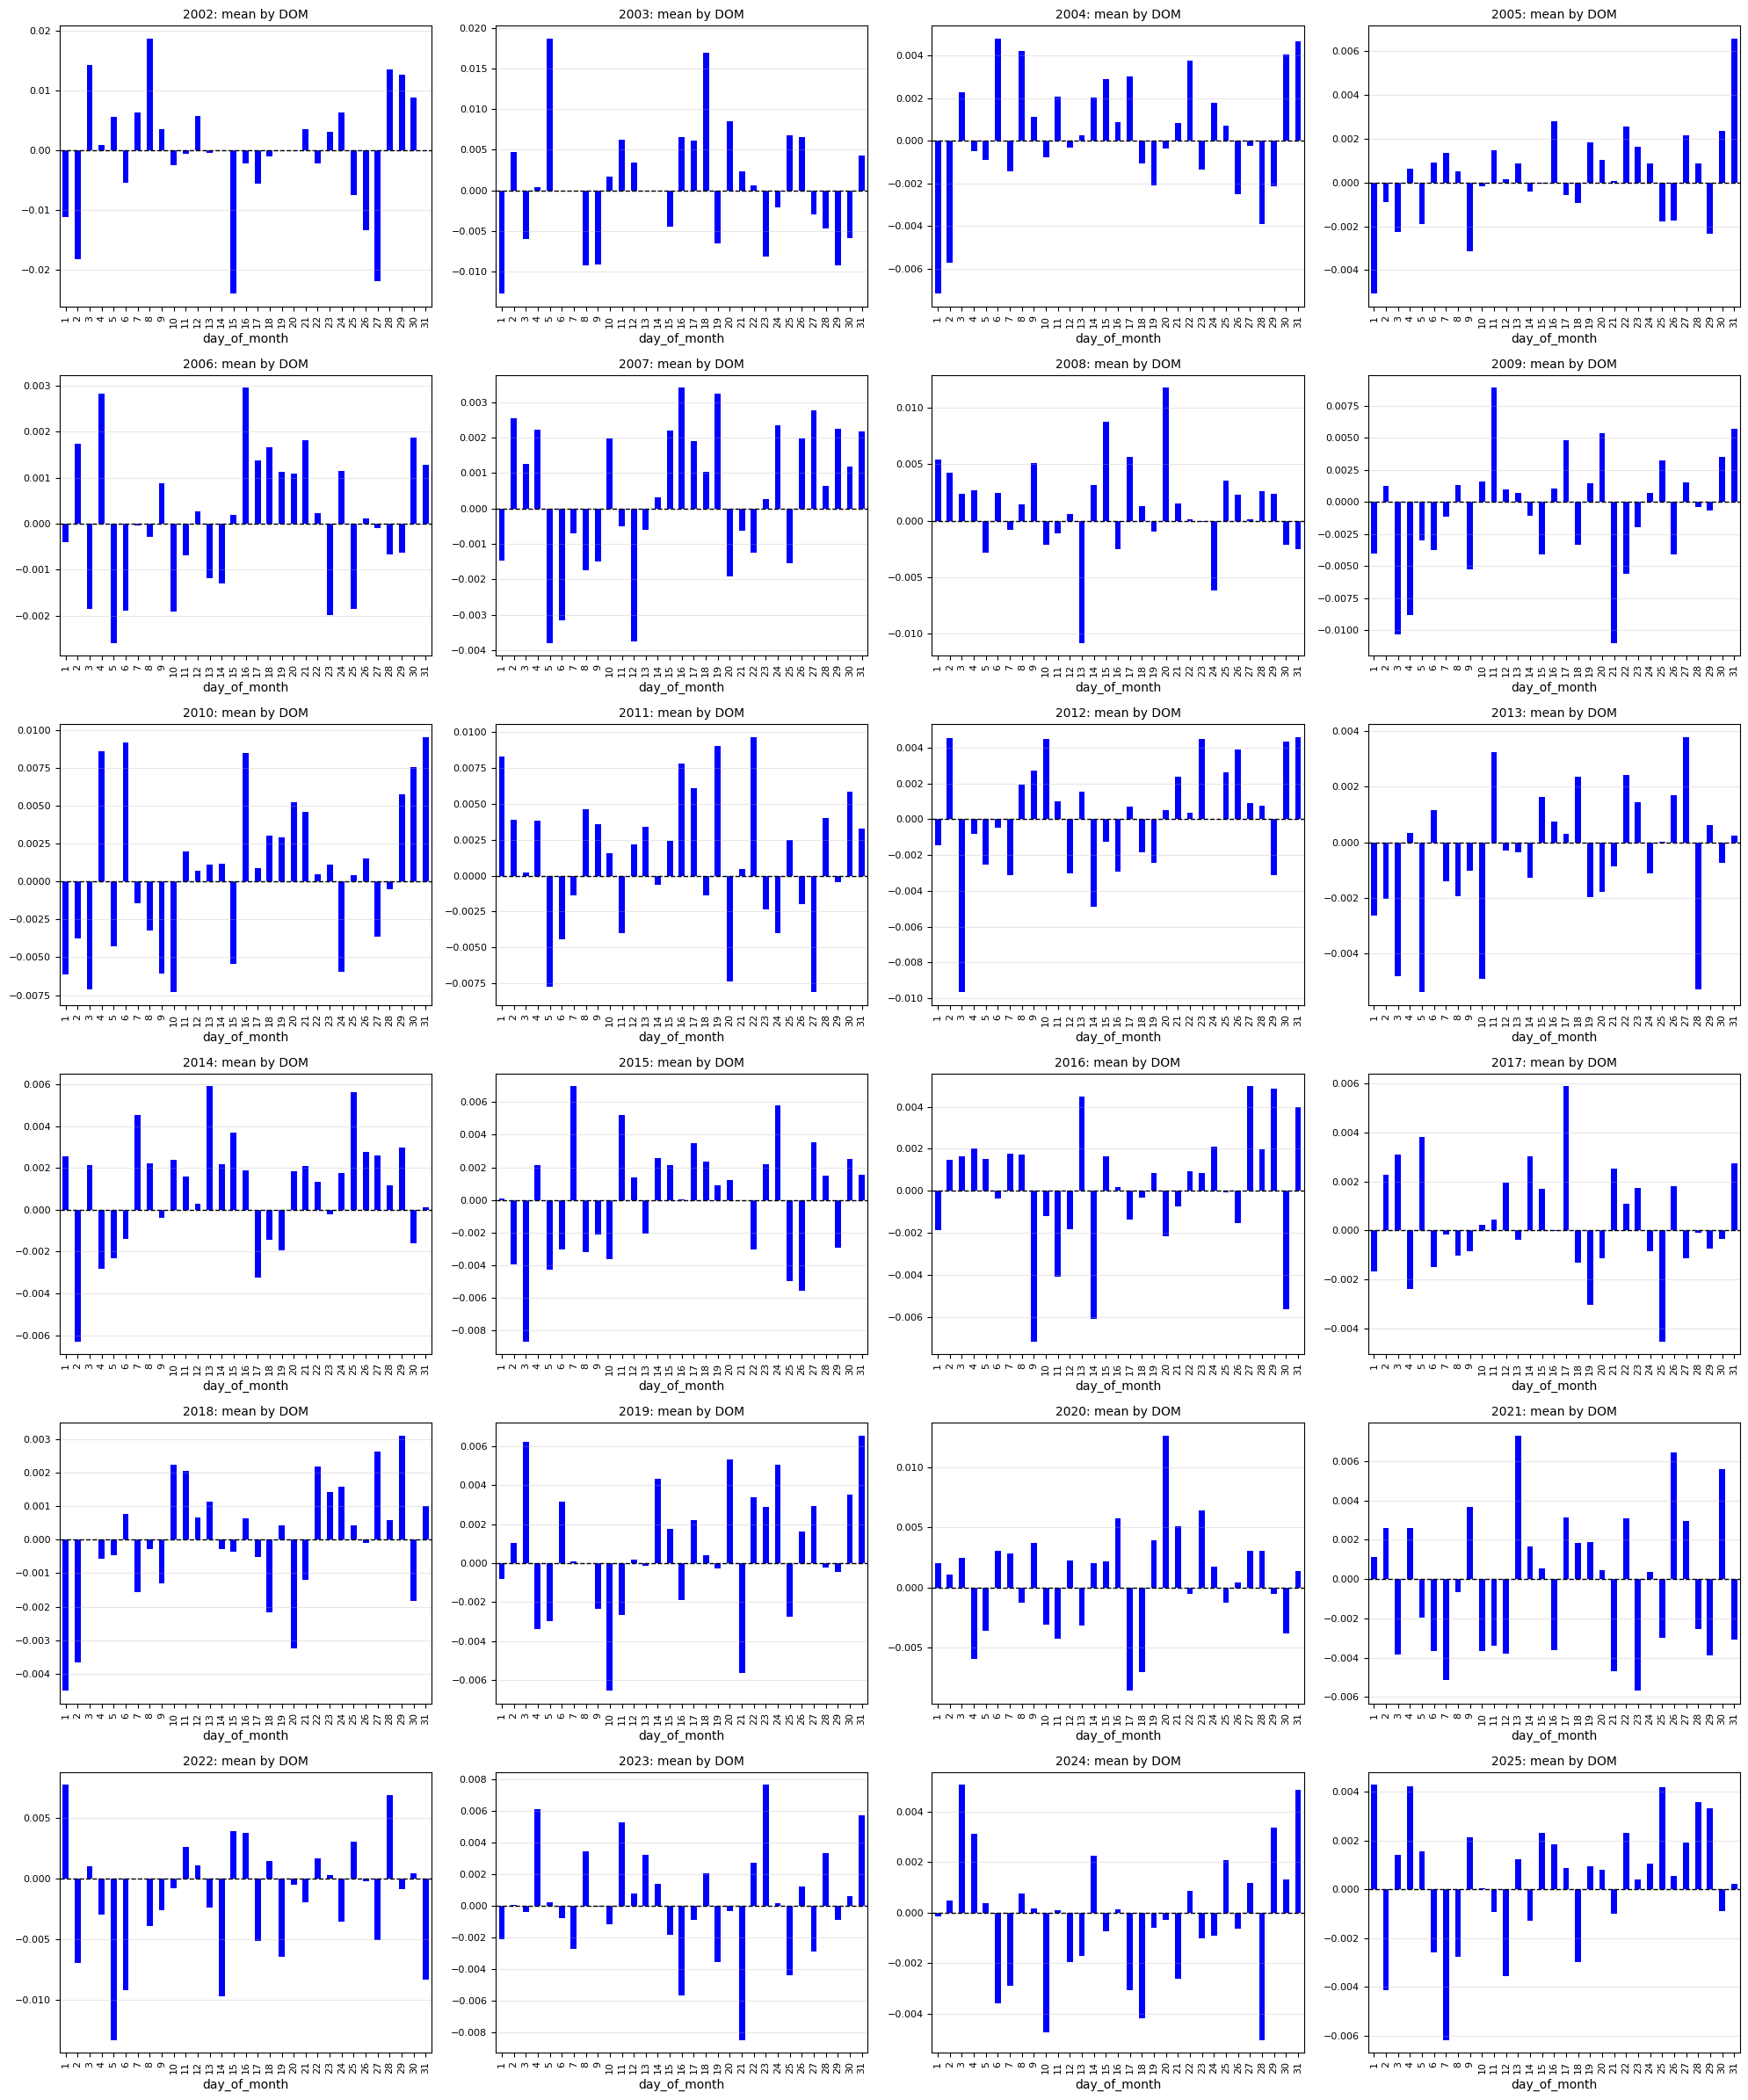

In [7]:
dom_year = (TLT.groupby(['year', 'day_of_month'])['returns']
                .mean()
                .dropna()
                .unstack('year')
                .sort_index()
            )

# Create subplots with 5 columns per row
years_list = dom_year.columns.tolist()
n_years = len(years_list)
n_cols = 4
n_rows = (n_years + n_cols - 1) // n_cols  # Ceiling division

# Create figure with appropriate size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, yr in enumerate(years_list):
    ax = axes[idx]
    dom_year[yr].plot(kind='bar', ax=ax, color='blue')
    ax.set_title(f'{yr}: mean by DOM', fontsize=10)
    ax.axhline(0, color='k', ls='--', lw=1)
    ax.grid(True, axis='y', alpha=0.3)
    ax.tick_params(labelsize=8)

# Hide unused subplots
for idx in range(n_years, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()




In [8]:
# Simple: First 7 vs Last 7 DOM by year
TLT['period'] = TLT['day_of_month'].apply(lambda x: 'First_7' if x <= 7 else ('Last_7' if x >= 25 else None))

# Group by year and period
results = TLT[TLT['period'].notna()].groupby(['year', 'period'])['returns'].mean().unstack()

print(results)
print("\nDifference (First_7 - Last_7):")
print(results['Last_7'] - results['First_7'])


period   First_7    Last_7
year                      
2002    0.000737  0.000196
2003   -0.000139 -0.001892
2004   -0.001412 -0.000385
2005   -0.001008  0.000544
2006   -0.000538 -0.000035
2007   -0.000629  0.001422
2008    0.001842  0.001238
2009   -0.004108  0.000996
2010   -0.000979  0.002396
2011    0.000609  0.000590
2012   -0.001956  0.002048
2013   -0.002132  0.000087
2014   -0.000446  0.002007
2015   -0.001706 -0.000391
2016    0.000831  0.001426
2017    0.000525 -0.000382
2018   -0.001401  0.000841
2019    0.000332  0.001249
2020    0.000410  0.000352
2021   -0.001103  0.000788
2022   -0.002913  0.000123
2023   -0.000177  0.000271
2024    0.000398  0.000972
2025   -0.000584  0.002051

Difference (First_7 - Last_7):
year
2002   -0.000540
2003   -0.001753
2004    0.001026
2005    0.001553
2006    0.000504
2007    0.002051
2008   -0.000604
2009    0.005104
2010    0.003375
2011   -0.000019
2012    0.004004
2013    0.002219
2014    0.002453
2015    0.001315
2016    0.000596
2017  